In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## 1.Data Preprocessing

In [50]:
ecom_data=pd.read_csv('ecommerce.csv',encoding='ISO-8859-1')
ecom_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [51]:
ecom_data.shape

(541909, 8)

### Data Dictonary

- **InvoiceNo**: The invoice number for each transaction.

- **StockCode**: Code for each item.

- **Description**: Description of the item.

- **Quantity**: The quantity of each item purchased.

- **InvoiceDate**: The date and time of the transaction.

- **UnitPrice**: Price per unit of the item.

- **CustomerID**: ID of the customer.

- **Country**: Country of the customer.

In [52]:
#Checking the null values
ecom_data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The dataset contains missing values in two columns:

**Description**: 1,454 missing values.

**CustomerID**: 135,080 missing values.

Handling these missing values is crucial for accurate analysis. The approach to dealing with them depends on the context:

**Description**: Since this is a text field, the missing descriptions might not significantly impact the RFM analysis. However, they could be relevant for product-based insights. We could either ignore these missing descriptions during RFM analysis or investigate further to determine if they should be filled or removed.

**CustomerID**: This field is essential for RFM analysis since it identifies unique customers. Missing customer IDs could indicate guest purchases or data entry errors. Given the significant number of missing values, removing these records might substantially reduce the dataset. A deeper investigation is needed to decide how to handle these.

In [53]:
ecom_data[ecom_data['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


The sample of records with missing CustomerID values shows that these transactions still contain valid information regarding products, quantities, and prices. However, without the customer identifiers, these records cannot be used for RFM analysis, as the analysis requires tracking purchases back to individual customers.

Given the large number of records with missing CustomerIDs, removing all of them may significantly reduce the dataset. Nonetheless, for the purposes of accurate RFM analysis, we should proceed with excluding these records.

Next, I will check the records with missing Description to see if they correspond with the missing CustomerID records or represent a different subset. This will help us understand if we can safely ignore these missing descriptions or need to address them separately. 

In [54]:
ecom_data[ecom_data['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


It appears that all records with missing Description also have missing CustomerID. This is evident from the fact that there are no records with a missing Description and a present CustomerID, as indicated by the error generated when trying to sample such records.

Given this overlap, it is reasonable to proceed with removing all records with missing CustomerID, as this will also remove those with missing Description. This approach streamlines the dataset for RFM analysis while ensuring the integrity of the data.

In [55]:
#Dropping Customer ID Column
ecom_cleaned_data=ecom_data.dropna(subset=['CustomerID'])

ecom_cleaned_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [56]:
ecom_cleaned_data.shape

(406829, 8)

In [57]:
ecom_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [58]:
# Convert CustomerID from float to int
ecom_cleaned_data['CustomerID'] = ecom_cleaned_data['CustomerID'].astype(int)

# Convert InvoiceDate to datetime
ecom_cleaned_data['InvoiceDate'] = pd.to_datetime(ecom_cleaned_data['InvoiceDate'])

print(ecom_cleaned_data.info())

C:\Users\vikra\AppData\Local\Temp\ipykernel_35220\192763593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_cleaned_data['CustomerID'] = ecom_cleaned_data['CustomerID'].astype(int)
C:\Users\vikra\AppData\Local\Temp\ipykernel_35220\192763593.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_cleaned_data['InvoiceDate'] = pd.to_datetime(ecom_cleaned_data['InvoiceDate'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.4+ MB
None


In [59]:
ecom_cleaned_data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [60]:
ecom_cleaned_data.duplicated().sum()

5225

There are 5225 duplicates in the dataset. So we will be removing the duplicates in the dataset.

In [61]:
#Remove the duplicates
ecom=ecom_cleaned_data.drop_duplicates()

The Quantity column has negative values which cannot be possible. So we can remove the rows which are having negative quantities.

In [62]:
ecom_cleaned=ecom[ecom['Quantity']>0]
ecom_cleaned.shape

(392732, 8)

In [63]:
ecom_cleaned.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [64]:
# Generating revenue per product (Quantity * UnitPrice)
ecom_cleaned['Revenue'] = ecom_cleaned['Quantity'] * ecom_cleaned['UnitPrice']

C:\Users\vikra\AppData\Local\Temp\ipykernel_35220\1073898724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_cleaned['Revenue'] = ecom_cleaned['Quantity'] * ecom_cleaned['UnitPrice']


## 2.RFM Calculation

Recency (R): Calculate the number of days since each customer's last purchase. We'll need to find the most recent purchase date for each customer and subtract this date from a reference date (which is typically the day after the last date in the dataset).

Frequency (F): Calculate the total number of orders for each customer. This can be done by counting the number of unique invoices for each customer.

Monetary (M): Calculate the sum of the total price for each customer. This involves summing the product of Quantity and UnitPrice for each customer.

Let's start by determining the reference date and then calculating each of these metrics.

The RFM (Recency, Frequency, Monetary) metrics for each customer have been successfully calculated:

Recency (R): This represents the number of days since the customer's last purchase. The date is calculated relative to a reference date, which is one day after the last date in the dataset.

Frequency (F): This indicates the total number of orders (unique invoices) for each customer.

Monetary (M): This is the total monetary value of a customer's purchases, calculated as the sum of the total price (Quantity * UnitPrice) for each customer.

In [65]:
from datetime import timedelta

# Determining the reference date (a day after the last date in the dataset)
reference_date = ecom_cleaned['InvoiceDate'].max() + timedelta(days=1)

# Calculating Recency
recency = ecom_cleaned.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (reference_date - recency['InvoiceDate']).dt.days

# Calculating Frequency
frequency = ecom_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

# Calculating Monetary
monetary = ecom_cleaned.groupby('CustomerID')['Revenue'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

# Merging the RFM metrics into a single dataframe
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')

# Displaying the first few rows of the RFM dataframe
rfm.head()


,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,326,1,77183.60
1,12347,2011-12-07 15:52:00,2,7,4310.00
2,12348,2011-09-25 13:13:00,75,4,1797.24
3,12349,2011-11-21 09:51:00,19,1,1757.55
4,12350,2011-02-02 16:01:00,310,1,334.40


## 3.RFM Segementation

In [66]:
# Assigning quartile-based scores to Recency, Frequency, and Monetary metrics
# Lower recency is better, hence the use of rank method for scoring
rfm['R_Score'] = pd.qcut(rfm['Recency'].rank(method='first', ascending=True), 4, labels=[4, 3, 2, 1])

# Higher frequency and monetary values are better, hence the reverse ranking
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first', ascending=False), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first', ascending=False), 4, labels=[1, 2, 3, 4])

# Combining RFM scores into a single score (by concatenating their string representations)
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm.head()  # Displaying the first few rows with RFM scores

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346,2011-01-18 10:01:00,326,1,77183.60,1,3,1,131
1,12347,2011-12-07 15:52:00,2,7,4310.00,4,1,1,411
2,12348,2011-09-25 13:13:00,75,4,1797.24,2,2,1,221
3,12349,2011-11-21 09:51:00,19,1,1757.55,3,3,1,331
4,12350,2011-02-02 16:01:00,310,1,334.40,1,3,3,133


## 4. Customer Segmentation

For n_clusters=2, the silhouette score is 0.8958611714763172
For n_clusters=3, the silhouette score is 0.594372718368177
For n_clusters=4, the silhouette score is 0.616319585697484
For n_clusters=5, the silhouette score is 0.6156663031004368
For n_clusters=6, the silhouette score is 0.5875163699085049
For n_clusters=7, the silhouette score is 0.5190339876252934
For n_clusters=8, the silhouette score is 0.4768394910742316
For n_clusters=9, the silhouette score is 0.4777698143431081
For n_clusters=10, the silhouette score is 0.4275691376821762
For n_clusters=11, the silhouette score is 0.4276793445852969
For n_clusters=12, the silhouette score is 0.4191723482387688
For n_clusters=13, the silhouette score is 0.4180795925583827
For n_clusters=14, the silhouette score is 0.4123788546689249


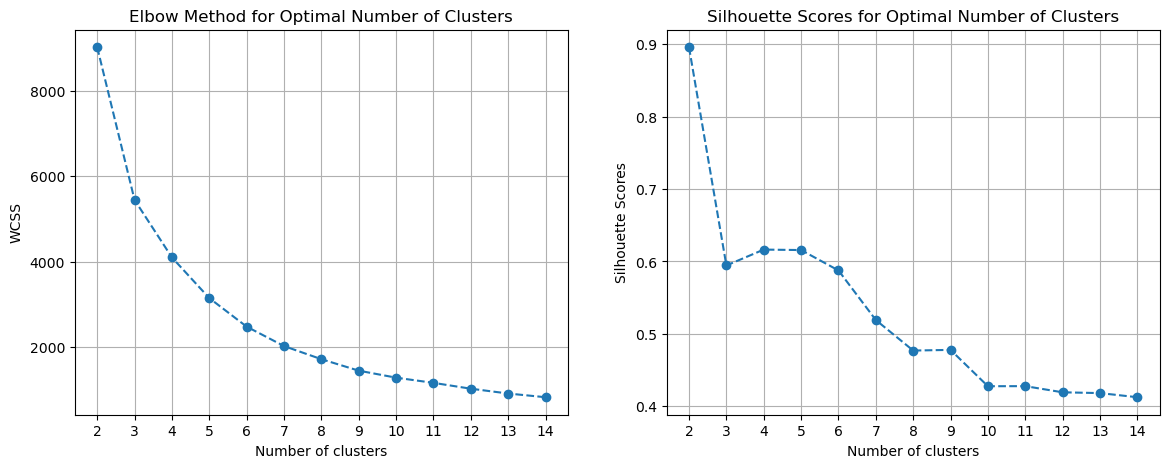

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Preparing the data for K-Means clustering
# Data Preparation: Scaling the RFM scores
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Convert the standardized values back to a DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_scaled_df['CustomerID'] = rfm['CustomerID']

# Experimenting with different numbers of clusters
# Using the Elbow Method to find the optimal number of clusters
wcss = []
silhouette_scores = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))
    print("For n_clusters={0}, the silhouette score is {1}".format(i,silhouette_score(rfm_scaled, kmeans.labels_)))
    
plt.figure(figsize=(14,5))
# Plotting the results of the Elbow Method
plt.subplot(1,2,1)
#plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(2, 15, 1))
plt.grid(True)
#plt.show()

# Plotting the results of the Elbow Method
#plt.figure(figsize=(10, 6))
plt.subplot(1,2,2)
plt.plot(range(2, 15), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.xticks(np.arange(2, 15, 1))
plt.grid(True)

plt.show()

Based on the above two methods i.e., Elbow Method and Silhouette method The optimal number of clusters to ber considered is **3**.

In [68]:
# Applying K-Means clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(rfm_scaled)

# Adding the cluster labels to the RFM dataframe
rfm['Cluster_3'] = kmeans_3.labels_
rfm_scaled_df['Cluster_3'] = kmeans_3.labels_

# Viewing the first few rows with cluster labels
#rfm[['RFM_Score', 'Cluster_3', 'Cluster_4', 'Cluster_5']].head()
rfm_scaled_df

,Recency,Frequency,Monetary,CustomerID,Cluster_3
0,2.334858,-0.424675,8.363977,12346,0
1,-0.905199,0.354080,0.251779,12347,2
2,-0.175186,-0.035297,-0.027938,12348,2
3,-0.735196,-0.424675,-0.032357,12349,2
4,2.174855,-0.424675,-0.190780,12350,0
...,...,...,...,...,...
4334,1.854850,-0.424675,-0.207901,18280,0
4335,0.884833,-0.424675,-0.219008,18281,0
4336,-0.845198,-0.294882,-0.208185,18282,2
4337,-0.885199,1.522213,-0.000299,18283,2


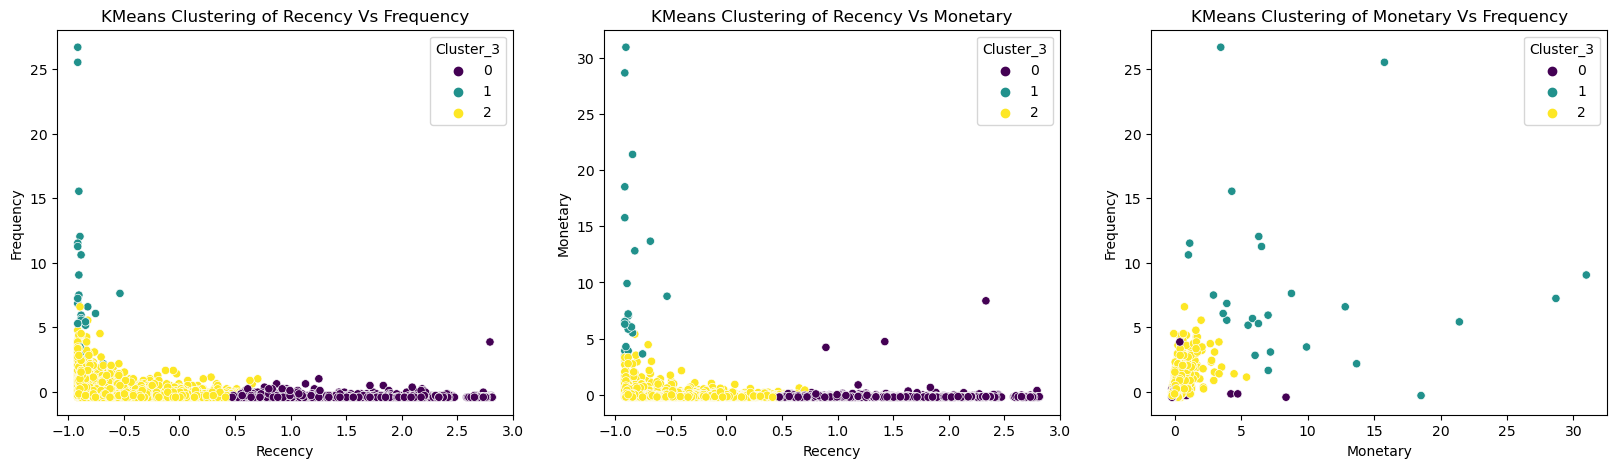

In [69]:
# Visualizing the clusters on the first two columns
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster_3', data=rfm_scaled_df, palette='viridis')
plt.title('KMeans Clustering of Recency Vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster_3', data=rfm_scaled_df, palette='viridis')
plt.title('KMeans Clustering of Recency Vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.subplot(1,3,3)
sns.scatterplot(x='Monetary', y='Frequency', hue='Cluster_3', data=rfm_scaled_df, palette='viridis')
plt.title('KMeans Clustering of Monetary Vs Frequency')
plt.xlabel('Monetary')
plt.ylabel('Frequency')

plt.show()

Here is the scatter plot displaying the scaled RFM data, specifically focusing on Recency and Frequency dimensions, with the hue parameter indicating the cluster each point belongs to. This visualization helps in understanding how the customers are distributed across different clusters based on their recent engagement and frequency of purchases.

## 5.Segment Profiling

In [70]:
# Calculating the mean values of RFM metrics for each cluster
cluster_profile = rfm.groupby('Cluster_3').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID':'count'
}).reset_index()

# Renaming columns for better readability
cluster_profile.columns = ['Cluster', 'Average Recency', 'Average Frequency', 'Average Monetary', 'Number of Customers']
cluster_profile

,Cluster,Average Recency,Average Frequency,Average Monetary,Number of Customers
0,0,247.106285,1.582255,629.663689,1082
1,1,6.038462,66.500000,85826.078077,26
2,2,41.445682,4.671928,1849.097726,3231


The profile for each customer segment, based on the mean values of their Recency, Frequency, and Monetary metrics, is as follows:

### Cluster 0:
- **Recency**:Customers in this cluster have not made a purchase in a while, with an average recency of 247 days. 
- **Frequency**: They have a lower frequency of orders, averaging around 1.58. 
- **Monetary** Their average total spending is relatively low, around 630.


### Cluster 1:
- **Recency**: This group consists of very recent customers, with an average last purchase made just 6 days ago. 
- **Frequency**: They are the most frequent shoppers, with a very high average order count of 66.5. 
- **Monetary**: They also spend the most, with an average total spending of a staggering 85,826. 


### Cluster 2:
- **Recency**: On average, customers in this cluster made their last purchase around 41 days ago. 
- **Frequency**: They make purchases relatively frequently, averaging about 4.67 orders. 
- **Monetary**: The average total spending of these customers is approximately 1,849. 


### Segment Profiling Summary:
- Cluster 2 represents a segment of regular and moderately recent customers with moderate spending.
- Cluster 0 includes customers who have not shopped recently, are infrequent buyers, and spend less.
- Cluster 1 consists of highly engaged and high-spending customers who have made purchases very recently and do so frequently.

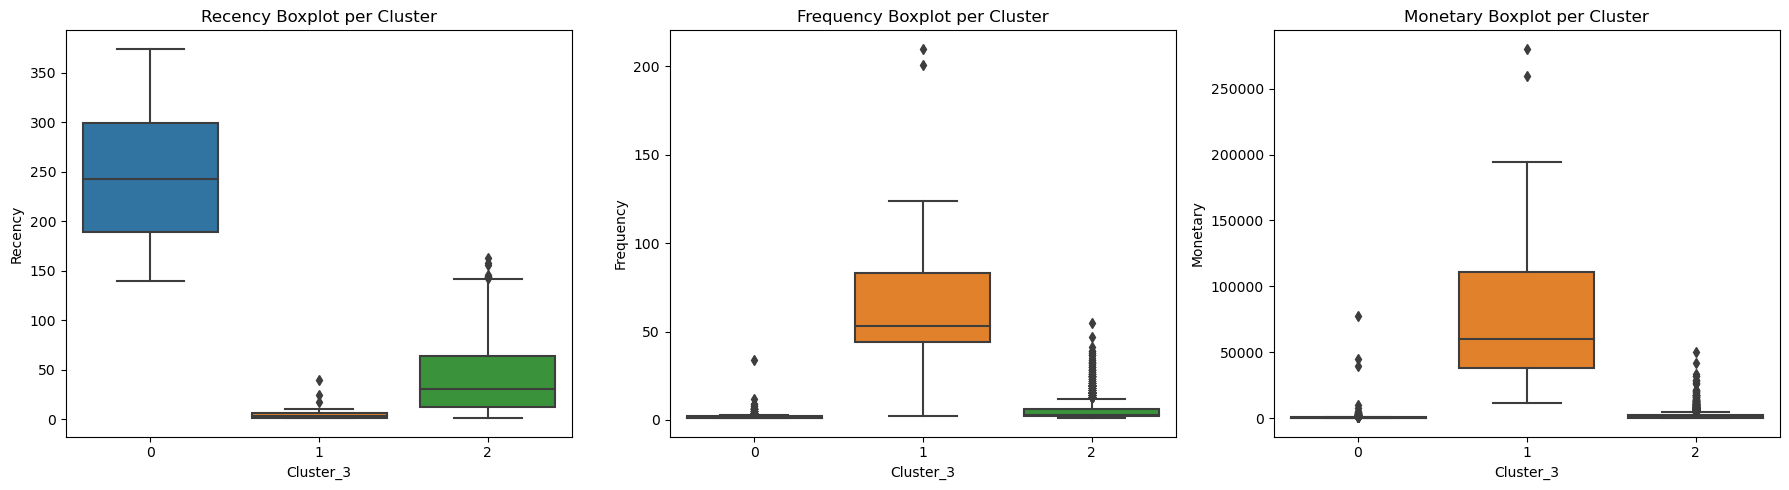

In [71]:
# Boxplots for RFM Metrics per Cluster
plt.figure(figsize=(18, 5))

# Recency Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster_3', y='Recency', data=rfm)
plt.title('Recency Boxplot per Cluster')

# Frequency Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster_3', y='Frequency', data=rfm)
plt.title('Frequency Boxplot per Cluster')

# Monetary Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster_3', y='Monetary', data=rfm)
plt.title('Monetary Boxplot per Cluster')

plt.tight_layout()
plt.show()

These boxplots display the distribution of Recency, Frequency, and Monetary values within each cluster. The spread and outliers in each metric can be observed, indicating the variability within each segment.

### Recency Boxplot:
- This shows how recently customers in each cluster have made a purchase.
- A smaller median (the line in the middle of the box) indicates more recent activity.
- A larger box or longer whiskers indicate greater variation in the recency of purchases within the cluster.
- Outliers, if any, are shown as points beyond the whiskers and represent customers whose purchasing behavior is significantly different from the majority in the cluster.

### Frequency Boxplot:
- This illustrates how often customers in each cluster make purchases.
- A higher median suggests that customers in that cluster purchase more frequently.
- A wider box or longer whiskers indicate a greater variety in purchasing frequency.
- Outliers here would represent customers who are either unusually frequent or infrequent shoppers compared to their cluster.

### Monetary Boxplot:
- This plot indicates the distribution of the total amount spent by customers in each cluster.
- A higher median shows a higher average spend in the cluster.
- The range of the box and the length of the whiskers reveal the spread of spending within the cluster, with a wider range indicating more variability.
- Outliers in this context would be customers who spend significantly more or less than others in their cluster.

## 6.Market Recommendations

### Cluster 0 
**Characteristics**: Regular and moderately recent customers with moderate spending.
#### Marketing Strategies:
- **Loyalty Program**s: Encourage repeat purchases through loyalty rewards or points.
- **Targeted Promotions**: Send promotions on products related to their past purchases.
- **Engagement Campaigns**: Use email or social media campaigns to keep the brand top-of-mind.
- **Feedback and Surveys**: Engage them in product feedback to enhance their sense of involvement.

### Cluster 1 
**Characteristics**: Customers who have not shopped recently, are infrequent buyers, and spend less.
#### Marketing Strategies:
- **Reactivation Campaigns**: Send "We miss you" messages with special discounts to re-engage.
- **Personalized Offers**: Make them feel special with personalized offers based on past purchases or browsing history.
- **Market Research**: Understand their lack of engagement - price, product range, or service issues.
- **Adjustment in Product/Service Offerings**: Consider diversifying the product range or adjusting pricing strategies to meet their needs.

### Cluster 2 
**Characteristics**: Highly engaged, high-spending customers who have made purchases very recently.
#### Marketing Strategies:
- **Exclusive Membership**: Offer them an exclusive membership or VIP status with special benefits.
- **Upselling and Cross-Selling**: Recommend premium products or complementary items to their usual purchases.
- **Early Access to New Products**: Give them early access to new products or sales events.
- **Personalized Communication**: Maintain regular, personalized communication and recognize their value to your business.

### General Strategies
- **Data Analysis**: Continuously analyze customer data to stay updated on changing behaviors and preferences.
- **Omnichannel Presence**: Ensure a consistent, high-quality experience across all channels - online, offline, social media.
- **Customer Service Excellence**: Provide exceptional customer service to enhance satisfaction and loyalty.

In [72]:
# Further refining the segmentation criteria for a more balanced approach
def rfm_segment_refined(rfm_row):
    # Scores are string types, convert them to integers for comparison
    R, F, M = int(rfm_row['R_Score']), int(rfm_row['F_Score']), int(rfm_row['M_Score'])

    # Best Customers: Top quartile for frequency and monetary
    if F >= 3 and M >= 3:
        return 'Best Customers'
    
    # Loyal Customers: Top quartile for frequency
    elif F >= 3:
        return 'Loyal Customers'
    
    # Big Spenders: Top quartile for monetary
    elif M >= 3:
        return 'Big Spenders'
    
    # At Risk: Bottom quartile for recency
    elif R <= 2:
        return 'At Risk'
    
    # Lost Cheap Customers: Bottom quartile for frequency and monetary
    else:
        return 'Lost Cheap Customers'
    
# Apply the segmentation
rfm['Segment'] = rfm.apply(rfm_segment_refined, axis=1)

# Analyzing the segments
segment_analysis = rfm['Segment'].value_counts().reset_index()
segment_analysis.columns = ['Segment', 'Count']

segment_analysis


,Segment,Count
0,Best Customers,1809
1,Lost Cheap Customers,1330
2,At Risk,480
3,Loyal Customers,360
4,Big Spenders,360


We have successfully categorized customers into different segments. Here's the distribution of customers in each segment:

- **At Risk**: 480 customers
- **Best Customers**: 1809 customers
- **Big Spenders**: 360 customers
- **Lost Cheap Customers**: 1330 customers
- **Loyal Customers**: 360 customers

These segments now offer a more balanced view of the customer base, allowing for targeted marketing strategies:

- **At Risk**: Focus on re-engagement campaigns and personalized offers.
- **Best Customers**: Prioritize loyalty programs and exclusive benefits.
- **Big Spenders**: Target with upselling opportunities and premium offers.
- **Lost Cheap Customers**: Implement occasional reactivation tactics.
- **Loyal Customers**: Continue to nurture with rewards for frequent purchases.

## 7.Visualizations

C:\Users\vikra\AppData\Local\Temp\ipykernel_35220\2520725632.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['Recency'])
C:\Users\vikra\AppData\Local\Temp\ipykernel_35220\2520725632.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['Frequency'])
C:\Users\vikra\AppData\Local\Temp\

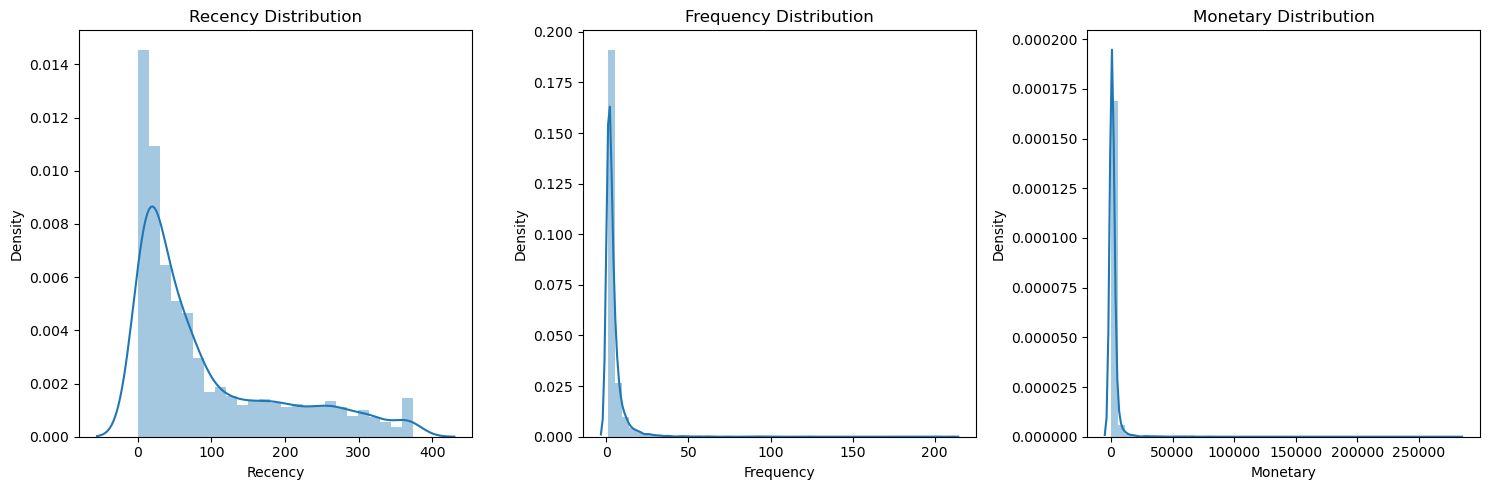

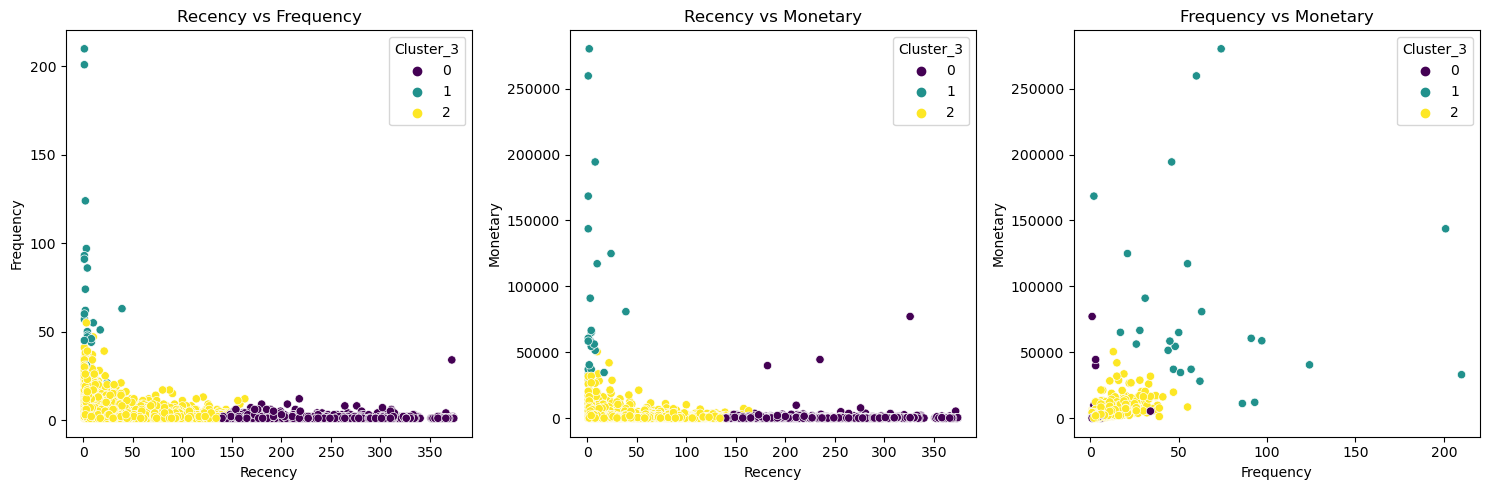

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'rfm' is your DataFrame with RFM scores and 'Cluster' column

# 1. RFM Distribution Plots
plt.figure(figsize=(15, 5))

# Recency Distribution
plt.subplot(1, 3, 1)
sns.distplot(rfm['Recency'])
plt.title('Recency Distribution')

# Frequency Distribution
plt.subplot(1, 3, 2)
sns.distplot(rfm['Frequency'])
plt.title('Frequency Distribution')

# Monetary Distribution
plt.subplot(1, 3, 3)
sns.distplot(rfm['Monetary'])
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

# 2. RFM Cluster Scatter Plots
plt.figure(figsize=(15, 5))

# Scatter plot for Recency vs Frequency
plt.subplot(1, 3, 1)
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster_3', data=rfm, palette='viridis')
plt.title('Recency vs Frequency')

# Scatter plot for Recency vs Monetary
plt.subplot(1, 3, 2)
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster_3', data=rfm, palette='viridis')
plt.title('Recency vs Monetary')

# Scatter plot for Frequency vs Monetary
plt.subplot(1, 3, 3)
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster_3', data=rfm, palette='viridis')
plt.title('Frequency vs Monetary')

plt.tight_layout()
plt.show()


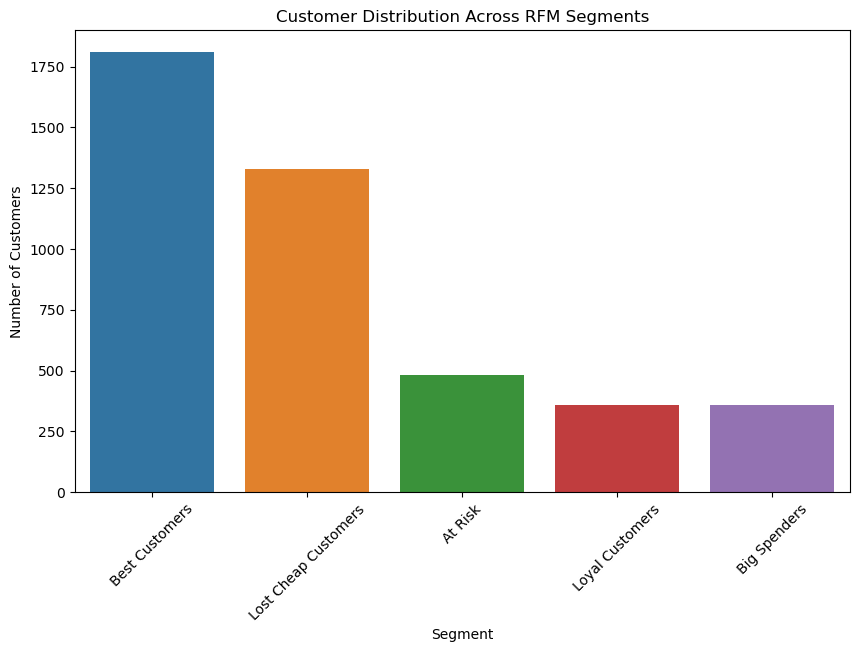

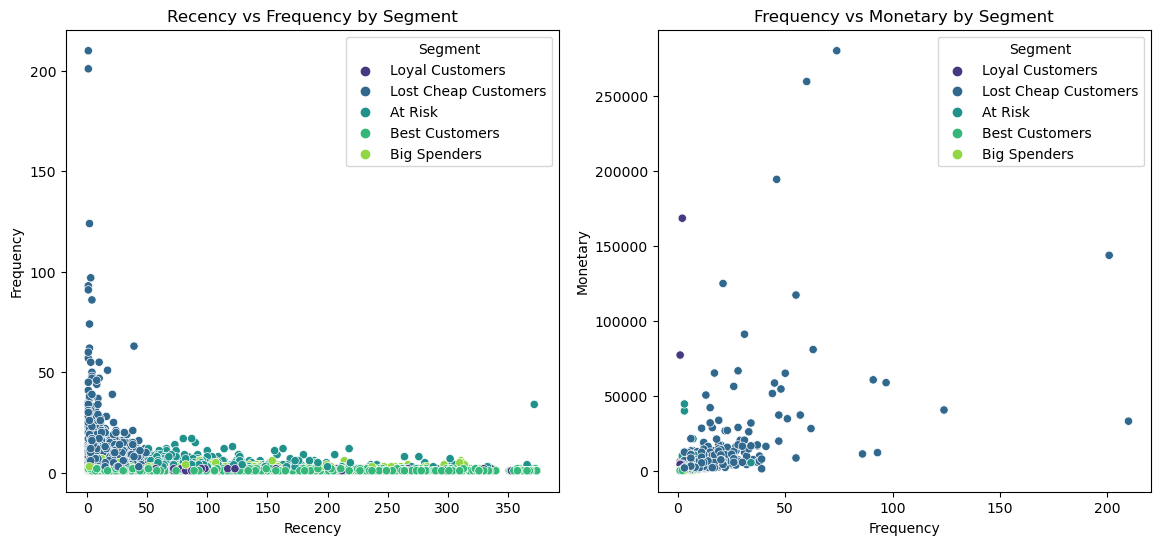

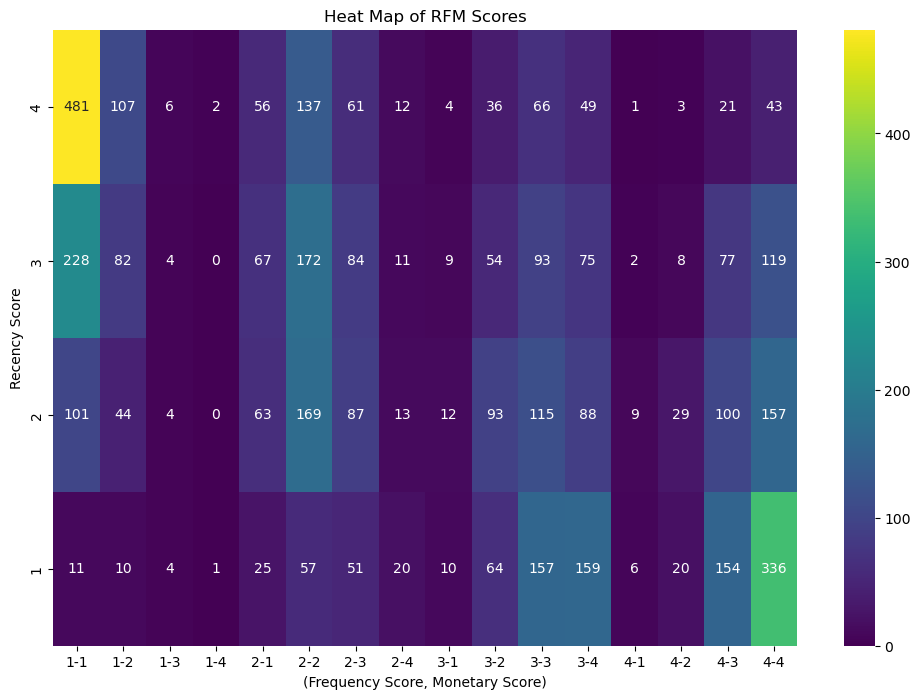

In [74]:
# Bar Chart for Segment Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Count', data=segment_analysis)
plt.title('Customer Distribution Across RFM Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Scatter Plots for RFM Metrics
# Plotting Recency vs Frequency
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Segment', palette='viridis')
plt.title('Recency vs Frequency by Segment')
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Plotting Frequency vs Monetary
plt.subplot(1, 2, 2)
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Segment', palette='viridis')
plt.title('Frequency vs Monetary by Segment')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

# Heat Map of RFM Scores
rfm_score_heatmap_data = rfm.groupby(['R_Score', 'F_Score', 'M_Score']).size().reset_index(name='Count')
rfm_score_heatmap_data_pivot = rfm_score_heatmap_data.pivot_table(index='R_Score', columns=['F_Score', 'M_Score'], values='Count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(rfm_score_heatmap_data_pivot, cmap='viridis', annot=True, fmt="d")
plt.title('Heat Map of RFM Scores')
plt.xlabel('(Frequency Score, Monetary Score)')
plt.ylabel('Recency Score')
plt.show()


Here are the visualizations illustrating the RFM distribution and the clusters formed:

### Bar Chart for Segment Distribution:
- This chart shows the number of customers in each RFM segment, providing a clear view of how customers are distributed across different categories.
- The largest segment is 'At Risk', indicating a significant number of customers have not made recent purchases, which might be a concern for customer retention.
- 'Best Customers' and 'Big Spenders' segments also have a substantial number of customers, suggesting a strong base of loyal and high-spending customers.
- The 'Loyal Customers' segment is relatively small, suggesting a potential area to increase customer loyalty initiatives.

### Scatter Plots for RFM Metrics:
#### Recency vs Frequency:
- Customers in the 'Best Customers' segment tend to cluster towards lower recency and higher frequency, indicating they are recent and frequent shoppers.
- 'At Risk' customers are spread across high recency values, showing their lack of recent engagement.
- The spread of data points suggests varying degrees of engagement across segments.

#### Frequency vs Monetary:
- 'Big Spenders' and 'Best Customers' show higher frequency and monetary values, indicating they are valuable customers with frequent and high-value purchases.
- The variation in monetary value across different frequencies indicates diverse spending behaviors even among similarly frequent shoppers.

### Heat Map of RFM Scores:
- This heat map presents the concentration of customers across different combinations of RFM scores. The intensity of the color indicates the number of customers in each combination of Recency, Frequency, and Monetary scores.
- The heat map displays the distribution of customers across combinations of Recency, Frequency, and Monetary scores.
- High concentration areas (warmer colors) indicate common customer profiles, while cooler colors represent less common profiles.
- The heatmap can be particularly useful in identifying common customer behaviors and trends, as well as rare but potentially significant customer profiles.

### Conclusions and Recommendations:
- **Focus on 'At Risk' Customers**: Develop re-engagement strategies like personalized emails or special offers to bring these customers back.
- **Nurture 'Best Customers' and 'Big Spenders'**: These segments are crucial for revenue. Offer loyalty programs, exclusive deals, and premium services to retain them.
- **Expand the 'Loyal Customers' Base**: Since this segment is small, consider strategies to increase customer loyalty among other segments.
- **Tailored Marketing Strategies**: Use the insights from the scatter plots and heat map to develop targeted marketing campaigns based on customer purchasing behavior and value to the business.

# Solutions

## 1.Data Overview

In [75]:
# Size of the dataset (rows and columns)
dataset_size = ecom_cleaned.shape

# Brief description of each column
column_descriptions = {
    "InvoiceNo": "Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.",
    "StockCode": "Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.",
    "Description": "Product (item) name.",
    "Quantity": "The quantities of each product (item) per transaction.",
    "InvoiceDate": "The day and time when each transaction was generated.",
    "UnitPrice": "Unit price. Numeric, Product price per unit in sterling.",
    "CustomerID": "Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.",
    "Country": "Country name. Nominal, the name of the country where each customer resides."
}

# Time period covered by the dataset
min_date, max_date = ecom_cleaned['InvoiceDate'].min(), ecom_cleaned['InvoiceDate'].max()

print("Number of rows in the dataset is: ",dataset_size[0])
print("Number of columns in the dataset is: ",dataset_size[1])
print(f"The dataset covers transactions from {min_date.strftime('%d %B,%Y')} to {max_date.strftime('%d %B,%Y')}")

Number of rows in the dataset is:  392732
Number of columns in the dataset is:  9
The dataset covers transactions from 01 December,2010 to 09 December,2011


## 2.Customer Analysis

In [78]:
# Counting unique customers
unique_customers = ecom_cleaned['CustomerID'].nunique()

# Distribution of the number of orders per customer
orders_per_customer = ecom_cleaned.groupby('CustomerID')['InvoiceNo'].nunique()

print(f"There are {unique_customers} unique customers in the dataset.\n")
print("Order per Customer:\n")
print(orders_per_customer,"\n")
print(orders_per_customer.describe())

There are 4339 unique customers in the dataset.

Order per Customer:

CustomerID
12346     1
12347     7
12348     4
12349     1
12350     1
         ..
18280     1
18281     1
18282     2
18283    16
18287     3
Name: InvoiceNo, Length: 4339, dtype: int64 

count    4339.000000
mean        4.271952
std         7.705493
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       210.000000
Name: InvoiceNo, dtype: float64


- **Mean**: On average, a customer has placed about 4.27 orders.
- **Standard Deviation**: The standard deviation is approximately 7.71, indicating a wide variation in the number of orders per customer.
- **Minimum**: The minimum number of orders by a customer is 1.
- **25th Percentile (Q1)**: 25% of customers have placed only 1 order.
- **Median (Q2)**: 50% of customers have placed 2 or fewer orders.
- **75th Percentile (Q3)**: 75% of customers have placed 5 or fewer orders.
- **Maximum**: The maximum number of orders placed by a single customer is 210.

In [79]:
# Identifying the top 5 customers by order count
top_5_customers_by_orders = orders_per_customer.sort_values(ascending=False).head(5)

print("Top 5 customers who have made the most purchases by order count:\n")
print(top_5_customers_by_orders)

Top 5 customers who have made the most purchases by order count:

CustomerID
12748    210
14911    201
17841    124
13089     97
14606     93
Name: InvoiceNo, dtype: int64


## 3.Product Analysis

In [81]:
# Top 10 most frequently purchased products
top_10_products = ecom_cleaned['Description'].value_counts().head(10)

# Calculating the average price of products
average_price = ecom_cleaned.groupby('Description')['Revenue'].sum()/ecom_cleaned.groupby('Description')['Quantity'].sum()

# Generating revenue per product (Quantity * UnitPrice)
#ecom_cleaned['Revenue'] = ecom_cleaned['Quantity'] * ecom_cleaned['UnitPrice']

# Finding the product category generating the highest revenue
# Assuming 'Description' as a proxy for product category
highest_revenue_product = ecom_cleaned.groupby('Description')['Revenue'].sum().idxmax()
highest_revenue = ecom_cleaned.groupby('Description')['Revenue'].sum().max()


In [82]:
top_10_products

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1390
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
Name: Description, dtype: int64

In [83]:
average_price

Description
 4 PURPLE FLOCK DINNER CANDLES       1.925072
 50'S CHRISTMAS GIFT BAG LARGE       1.205438
 DOLLY GIRL BEAKER                   1.150585
 I LOVE LONDON MINI BACKPACK         4.038579
 I LOVE LONDON MINI RUCKSACK         4.150000
                                      ...    
ZINC T-LIGHT HOLDER STARS SMALL      0.792803
ZINC TOP  2 DOOR WOODEN SHELF       16.950000
ZINC WILLIE WINKIE  CANDLE STICK     0.835035
ZINC WIRE KITCHEN ORGANISER          6.272000
ZINC WIRE SWEETHEART LETTER TRAY     3.165500
Length: 3877, dtype: float64

In [84]:
print(highest_revenue_product, ':', highest_revenue)

PAPER CRAFT , LITTLE BIRDIE : 168469.6


In [85]:
ecom_cleaned['Day'] = ecom_cleaned['InvoiceDate'].dt.day_name()
ecom_cleaned['Hour'] = ecom_cleaned['InvoiceDate'].dt.hour
ecom_cleaned['Month'] = ecom_cleaned['InvoiceDate'].dt.month_name()
ecom_cleaned['Year'] = ecom_cleaned['InvoiceDate'].dt.year

C:\Users\vikra\AppData\Local\Temp\ipykernel_35220\34633852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_cleaned['Day'] = ecom_cleaned['InvoiceDate'].dt.day_name()
C:\Users\vikra\AppData\Local\Temp\ipykernel_35220\34633852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_cleaned['Hour'] = ecom_cleaned['InvoiceDate'].dt.hour
C:\Users\vikra\AppData\Local\Temp\ipykernel_35220\34633852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

# 4.Time Analysis

In [86]:
most_orders_day = ecom_cleaned.groupby('Day')['InvoiceNo'].nunique().reset_index().max()
print('The day where most orders are placed:', most_orders_day.iloc[0])
print('Number of Orders:', most_orders_day.iloc[1])

The day where most orders are placed: Wednesday
Number of Orders: 4033


In [87]:
most_orders_hour = ecom_cleaned.groupby('Hour')['InvoiceNo'].nunique().reset_index().sort_values(by='InvoiceNo', ascending=False).iloc[0]
print('The Hour of the day where most orders are placed:', most_orders_hour.iloc[0])
print('Number of Orders:', most_orders_hour.iloc[1])

The Hour of the day where most orders are placed: 12
Number of Orders: 3130


# Average order processing time

To calculate the average order processing time, we typically need data that includes both the order placement date and the order shipment date (or completion date). The average order processing time is then calculated by finding the difference between these two dates for each order and averaging these differences across all orders.

However, based on the data we previously loaded and examined, it seems that we only have the 'InvoiceDate' available, which appears to represent the date and time when the order was placed or invoiced. We would need an additional date column indicating when each order was shipped or completed to calculate the average processing time.

If we have shipment date then we can differentiate the order date from shipment date and calculate the average order processing time

C:\Users\vikra\AppData\Local\Temp\ipykernel_35220\1720613226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_cleaned['MonthYear'] = ecom_cleaned['InvoiceDate'].dt.to_period('M')


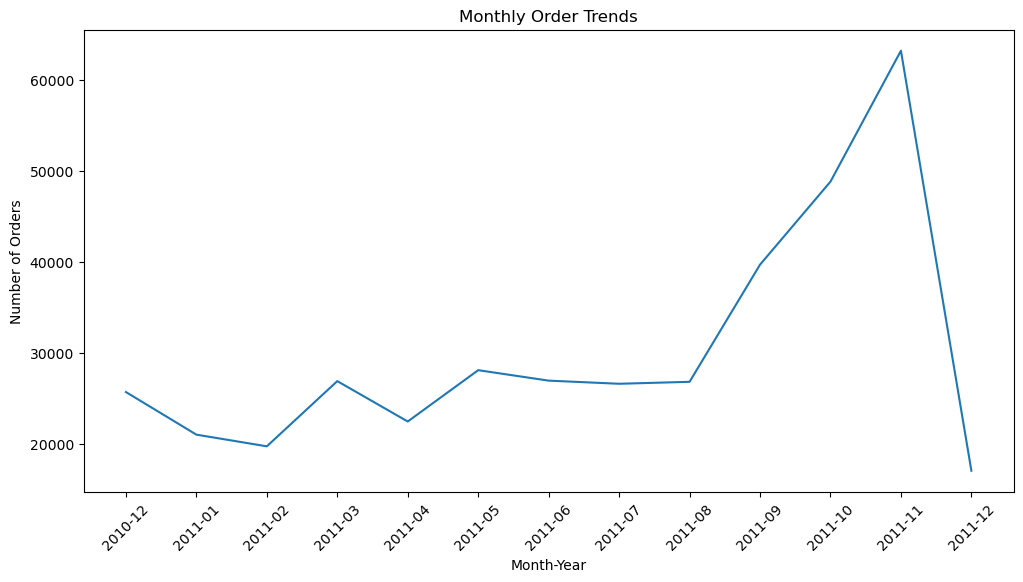

In [88]:
# Seasonal trends in the data

# Extracting the month and year from the 'InvoiceDate'
ecom_cleaned['MonthYear'] = ecom_cleaned['InvoiceDate'].dt.to_period('M')

# Counting the number of orders per month
monthly_order_counts = ecom_cleaned['MonthYear'].value_counts().sort_index()

# Plotting the monthly order counts
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_order_counts.index.astype(str), y=monthly_order_counts.values)
plt.title('Monthly Order Trends')
plt.xlabel('Month-Year')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

In [129]:
import pandas as pd

# Assuming ecom_cleaned is your DataFrame
result_df = ecom_cleaned.groupby(['Year', 'Month'])['InvoiceNo'].nunique().reset_index()

# Mapping month names to their respective order
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Converting 'Month' to categorical with custom order
result_df['Month'] = pd.Categorical(result_df['Month'], categories=month_order, ordered=True)

# Sorting the DataFrame by 'Year' and 'Month'
result_df = result_df.sort_values(by=['Year', 'Month'])

# If you want to reset the index after sorting
result_df = result_df.reset_index(drop=True)

# Displaying the result
result_df

,Year,Month,InvoiceNo
0,2010,December,1400
1,2011,January,987
2,2011,February,998
3,2011,March,1321
4,2011,April,1149
5,2011,May,1555
6,2011,June,1393
7,2011,July,1331
8,2011,August,1281
9,2011,September,1756


# 5.Geographical Analysis

In [90]:
# Top 5 countries with highest number of orders
ecom_cleaned.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).head(5)

Country
United Kingdom    16649
Germany             457
France              389
EIRE                260
Belgium              98
Name: InvoiceNo, dtype: int64

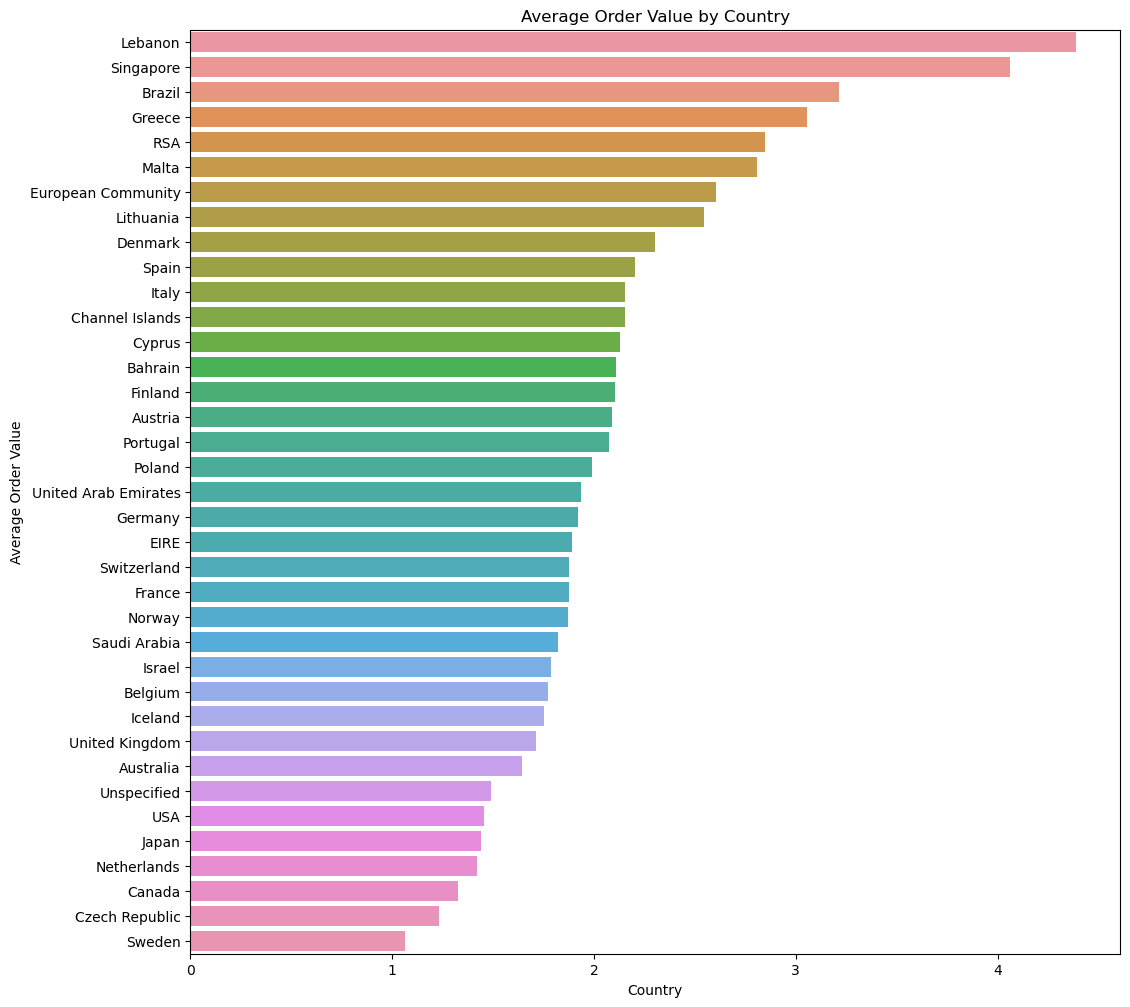

In [111]:
# Calculate the average order value for each country
avg_order_value_by_country = ecom_cleaned.groupby('Country')['Revenue'].sum()/ecom_cleaned.groupby('Country')['Quantity'].sum()

# Visualization
plt.figure(figsize=(12, 12))
sns.barplot(y=avg_order_value_by_country.sort_values(ascending=False).index, x=avg_order_value_by_country.sort_values(ascending=False).values)
plt.title('Average Order Value by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.show()

### Correlation
Certain countries, like the Lebanon,Singapore and Brazil have higher average order values compared to others. There is a wide range of average order values, from over 4.4 in the Lebanon to under 1.06 in the Sweden. The United Kingdom, which may be where the majority of customers are based (assuming from a common e-commerce dataset pattern), has a relatively lower average order value compared to the top countries listed.

## 6.Payment Analysis

THERE IS NO DATASET FOR PAYMENT METHOD , THIS WOULD BE THE NECESSARY STEPS IF THE PAYMENT METHOD WAS AVAILABLE IN THE DATASET.

#### For most common payment methods
payment_method_counts = data['PaymentMethod'].value_counts()

#### To assess the relationship between payment method and order amount
average_order_amount_by_payment = data.groupby('PaymentMethod')['TotalOrderValue'].mean()


## 7.Customer Behaviour

In [113]:
# Convert 'InvoiceDate' to datetime
ecom_cleaned['InvoiceDate'] = pd.to_datetime(ecom_cleaned['InvoiceDate'])

# Calculate the first and last purchase dates for each customer
customer_first_purchase = ecom_cleaned.groupby('CustomerID')['InvoiceDate'].min()
customer_last_purchase = ecom_cleaned.groupby('CustomerID')['InvoiceDate'].max()

# Calculate the duration of activity for each customer
customer_activity_duration = customer_last_purchase - customer_first_purchase

# Calculate the average duration
average_activity_duration = customer_activity_duration.mean()

# Print the result
print("Average duration customers remain active:", average_activity_duration)

Average duration customers remain active: 130 days 17:48:44.194514866


C:\Users\vikra\AppData\Local\Temp\ipykernel_35220\3916327945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_cleaned['InvoiceDate'] = pd.to_datetime(ecom_cleaned['InvoiceDate'])


Yes, There are customer segments based on their purchase behaiour. The segments are clearly explained in the RFM Analysis section.

## 8.Returns and Refunds

In [121]:
# Identify returned orders
returned_orders = ecom[ecom['Quantity'] < 0]['InvoiceNo'].nunique()
total_orders=ecom['InvoiceNo'].nunique()

# Percentage of orders with returns or refunds
percentage_returned_orders = (returned_orders / total_orders) * 100

print(f"Percentage of orders with returns or refunds: {percentage_returned_orders:.2f}")

Percentage of orders with returns or refunds: 16.47


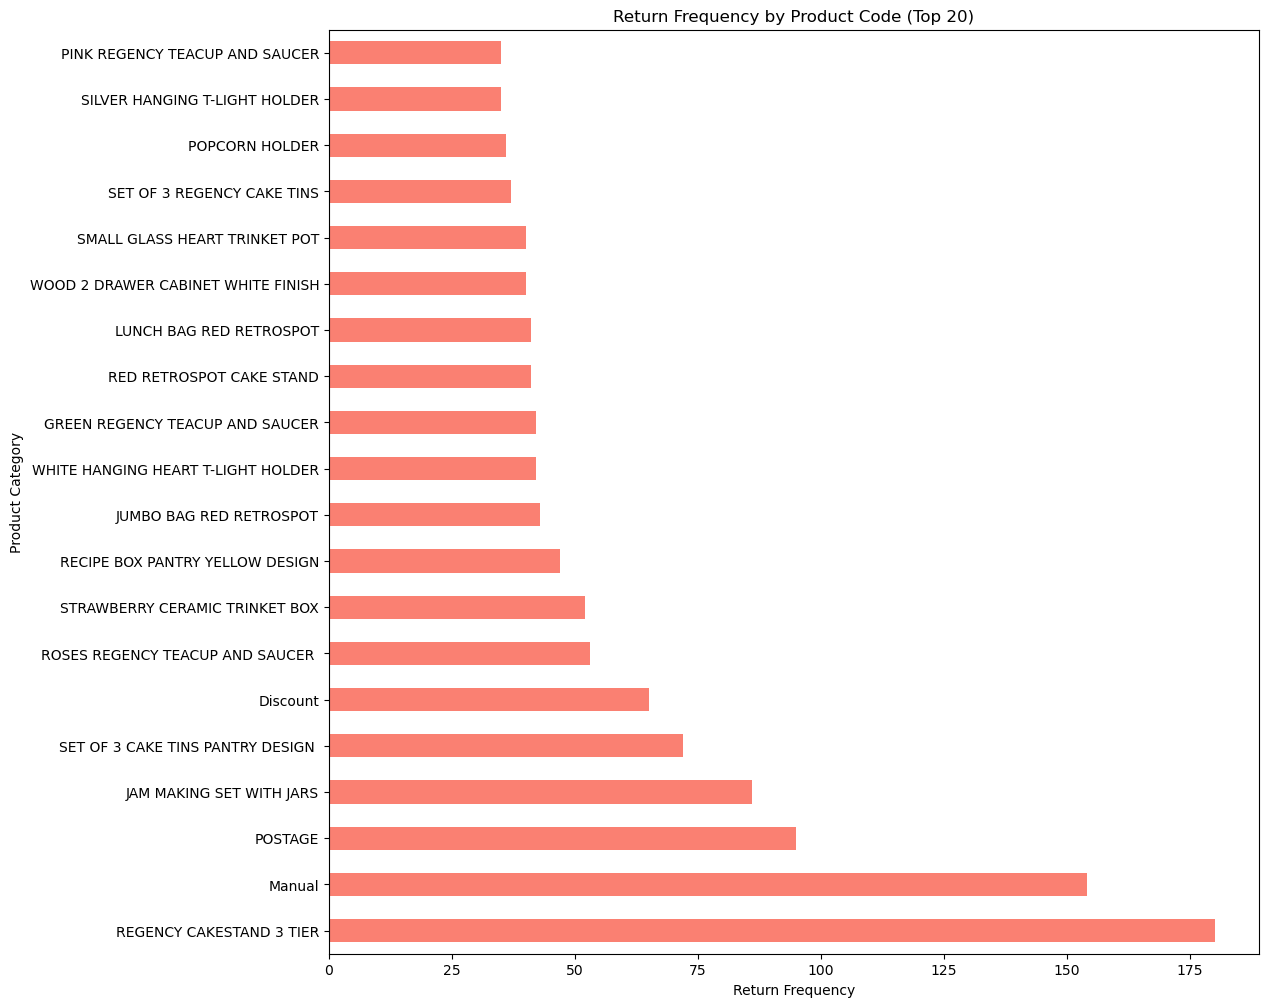

In [130]:
# Calculating return frequency for each product description
return_frequency_by_product = ecom[ecom['Quantity'] < 0].groupby('Description')['InvoiceNo'].nunique()

# Visualizing the return frequency
plt.figure(figsize=(12, 12))
return_frequency_by_product.sort_values(ascending=False).head(20).plot(kind='barh', color='salmon')
plt.title('Return Frequency by Product Code (Top 20)')
plt.xlabel('Return Frequency')
plt.ylabel('Product Category')
plt.show()

## 9.Profitability Analysis

Total Profit cannot be calculated as there is no Cost price given in the dataset.If the Cost Price is given then we would have calculated the Profit in the following way:

#### TOTAL PROFIT CALCULATION 
#### If the dataset had 'Cost Price' columns
#### Total Cost Revenue = CostPrice * Quantity
data['CostRevenue'] = data['CostPrice'] * data['Quantity']

#### Total Profit = Total Sales Revenue - Total Cost Revenue
total_profit = data['TotalRevenue'].sum() - data['CostRevenue'].sum()

#### TOP 5 PRODUCTS WITH HIGHEST PROFIT MARGIN 
#### Calculating Profit Margin for each product
#### Profit Margin = (SalesRevenue - Cost Revenue) / SalesRevenue
data['ProductProfitMargin'] = (data['SalesRevenue'] - data['Cost Revenue']) / data['SalesRevenue']

#### Group by Product and calculate average profit margin
average_profit_margin_by_product = data.groupby('Product')['ProductProfitMargin'].mean()

#### Finding top 5 products with the highest profit margins
top_5_products_profit_margin = average_profit_margin_by_product.sort_values(ascending=False).head(5)

## 10.Customer Satisfaction

The dataset does not have a CustomerFeedback column , if the CustomerFeedback column was available then the necessary steps that we would have performed are shown below. If the customer feedback is the form of text (reviews or comments), we will use Natural Language Processing (NLP) techniques to perform sentiment analysis. Python libraries like TextBlob can be used.

from textblob import TextBlob

#### Assuming 'data' has a 'CustomerFeedback' column
#### Apply TextBlob to each feedback to get sentiment polarity
data['SentimentPolarity'] = data['CustomerFeedback'].apply(lambda x: TextBlob(x).sentiment.polarity)

#### Categorize sentiments as Positive, Neutral, or Negative
data['Sentiment'] = pd.cut(data['SentimentPolarity'], bins=3, labels=["Negative", "Neutral", "Positive"])

#### Analyze sentiment distribution
sentiment_distribution = data['Sentiment'].value_counts()

sentiment_distribution

For Analysis of Feedback Trends there is no rating column available in the dataset.

If the dataset include numerical ratings like a 5-star , we would analyze trends such as the average rating per product, changes in ratings over time, or the distribution of ratings

#### Assuming 'data' has a 'Rating' column
#### Calculate the average rating for each product
average_rating_by_product = data.groupby('Product')['Rating'].mean()

#### Analyzing rating distribution
rating_distribution = data['Rating'].value_counts()

average_rating_by_product, rating_distribution